In [52]:
!pip install scipy


In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib inline 

# Read data files

daily_report= pd.read_csv("C:/Users/kyran/Documents/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03_15_2020.csv")

daily_report.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-15T18:20:18,67794,3085,54288,30.9756,112.2707
1,NaN,Italy,2020-03-14T20:13:16,24747,1809,2335,41.8719,12.5674
2,NaN,Iran,2020-03-15T18:20:18,13938,724,4590,32.4279,53.6880
3,NaN,"Korea, South",2020-03-15T18:20:18,8162,75,510,35.9078,127.7669
4,NaN,Spain,2020-03-15T18:20:18,7798,289,517,40.4637,-3.7492


In [4]:
daily_report.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,649.019380,24.961240,294.705426,27.534099,5.401220
std,4626.820447,227.106821,3394.892621,22.760023,81.591161
min,0.000000,0.000000,0.000000,-41.454500,-157.498300
25%,4.000000,0.000000,0.000000,15.345875,-72.744225
50%,26.500000,0.000000,0.000000,33.913000,10.976800
75%,118.500000,1.000000,4.750000,42.750475,72.251800
max,67794.000000,3085.000000,54288.000000,64.963100,174.886000


In [5]:
daily_report.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
Latitude          float64
Longitude         float64
dtype: object

In [12]:
# Generate a summary statistics table of sum, mean, median, variance, standard deviation, 
# and SEM of the confirmed, deaths, and recovery for each country

#Sum
confirmed_sum= daily_report.groupby('Country/Region').sum()['Confirmed']
deaths_sum= daily_report.groupby('Country/Region').sum()['Deaths']
recovered_sum= daily_report.groupby('Country/Region').sum()['Recovered']

confirmed_sum


Country/Region
Afghanistan                       16
Albania                           42
Algeria                           48
Andorra                            1
Antigua and Barbuda                1
                                  ..
Uruguay                            4
Uzbekistan                         1
Venezuela                         10
Vietnam                           56
occupied Palestinian territory     0
Name: Confirmed, Length: 147, dtype: int64

In [13]:
deaths_sum

Country/Region
Afghanistan                       0
Albania                           1
Algeria                           4
Andorra                           0
Antigua and Barbuda               0
                                 ..
Uruguay                           0
Uzbekistan                        0
Venezuela                         0
Vietnam                           0
occupied Palestinian territory    0
Name: Deaths, Length: 147, dtype: int64

In [14]:
recovered_sum

Country/Region
Afghanistan                        0
Albania                            0
Algeria                           12
Andorra                            1
Antigua and Barbuda                0
                                  ..
Uruguay                            0
Uzbekistan                         0
Venezuela                          0
Vietnam                           16
occupied Palestinian territory     0
Name: Recovered, Length: 147, dtype: int64

In [15]:
#mean
confirmed_mean= daily_report.groupby('Country/Region').mean()['Confirmed']
deaths_mean= daily_report.groupby('Country/Region').mean()['Deaths']
recovered_mean= daily_report.groupby('Country/Region').mean()['Recovered']

In [16]:
confirmed_mean

Country/Region
Afghanistan                       16.0
Albania                           42.0
Algeria                           48.0
Andorra                            1.0
Antigua and Barbuda                1.0
                                  ... 
Uruguay                            4.0
Uzbekistan                         1.0
Venezuela                         10.0
Vietnam                           56.0
occupied Palestinian territory     0.0
Name: Confirmed, Length: 147, dtype: float64

In [17]:
deaths_mean

Country/Region
Afghanistan                       0.0
Albania                           1.0
Algeria                           4.0
Andorra                           0.0
Antigua and Barbuda               0.0
                                 ... 
Uruguay                           0.0
Uzbekistan                        0.0
Venezuela                         0.0
Vietnam                           0.0
occupied Palestinian territory    0.0
Name: Deaths, Length: 147, dtype: float64

In [20]:
recovered_mean

Country/Region
Afghanistan                        0.0
Albania                            0.0
Algeria                           12.0
Andorra                            1.0
Antigua and Barbuda                0.0
                                  ... 
Uruguay                            0.0
Uzbekistan                         0.0
Venezuela                          0.0
Vietnam                           16.0
occupied Palestinian territory     0.0
Name: Recovered, Length: 147, dtype: float64

In [21]:
#median
confirmed_median= daily_report.groupby('Country/Region').median()['Confirmed']
deaths_median= daily_report.groupby('Country/Region').median()['Deaths']
recovered_median= daily_report.groupby('Country/Region').median()['Recovered']

In [22]:
confirmed_median

Country/Region
Afghanistan                       16.0
Albania                           42.0
Algeria                           48.0
Andorra                            1.0
Antigua and Barbuda                1.0
                                  ... 
Uruguay                            4.0
Uzbekistan                         1.0
Venezuela                         10.0
Vietnam                           56.0
occupied Palestinian territory     0.0
Name: Confirmed, Length: 147, dtype: float64

In [23]:
deaths_median

Country/Region
Afghanistan                       0.0
Albania                           1.0
Algeria                           4.0
Andorra                           0.0
Antigua and Barbuda               0.0
                                 ... 
Uruguay                           0.0
Uzbekistan                        0.0
Venezuela                         0.0
Vietnam                           0.0
occupied Palestinian territory    0.0
Name: Deaths, Length: 147, dtype: float64

In [24]:
recovered_median

Country/Region
Afghanistan                        0.0
Albania                            0.0
Algeria                           12.0
Andorra                            1.0
Antigua and Barbuda                0.0
                                  ... 
Uruguay                            0.0
Uzbekistan                         0.0
Venezuela                          0.0
Vietnam                           16.0
occupied Palestinian territory     0.0
Name: Recovered, Length: 147, dtype: float64

In [25]:
#variance
confirmed_variance= daily_report.groupby('Country/Region').var()['Confirmed']
deaths_variance= daily_report.groupby('Country/Region').var()['Deaths']
recovered_variance= daily_report.groupby('Country/Region').var()['Recovered']

In [26]:
confirmed_variance

Country/Region
Afghanistan                      NaN
Albania                          NaN
Algeria                          NaN
Andorra                          NaN
Antigua and Barbuda              NaN
                                  ..
Uruguay                          NaN
Uzbekistan                       NaN
Venezuela                        NaN
Vietnam                          NaN
occupied Palestinian territory   NaN
Name: Confirmed, Length: 147, dtype: float64

In [27]:
deaths_variance

Country/Region
Afghanistan                      NaN
Albania                          NaN
Algeria                          NaN
Andorra                          NaN
Antigua and Barbuda              NaN
                                  ..
Uruguay                          NaN
Uzbekistan                       NaN
Venezuela                        NaN
Vietnam                          NaN
occupied Palestinian territory   NaN
Name: Deaths, Length: 147, dtype: float64

In [28]:
recovered_variance

Country/Region
Afghanistan                      NaN
Albania                          NaN
Algeria                          NaN
Andorra                          NaN
Antigua and Barbuda              NaN
                                  ..
Uruguay                          NaN
Uzbekistan                       NaN
Venezuela                        NaN
Vietnam                          NaN
occupied Palestinian territory   NaN
Name: Recovered, Length: 147, dtype: float64

In [29]:
#How many rows per country?
country_count= daily_report['Country/Region'].value_counts()
country_count

US            56
China         33
Canada         9
Australia      9
France         6
              ..
Hungary        1
Bahrain        1
Namibia        1
Azerbaijan     1
Bhutan         1
Name: Country/Region, Length: 147, dtype: int64

In [83]:
#How many unique countries?
count=daily_report['Country/Region'].nunique()
count

147

In [84]:
country_list=daily_report['Country/Region'].unique()
country_list

array(['China', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany',
       'France', 'Switzerland', 'Norway', 'United Kingdom', 'Netherlands',
       'Sweden', 'Belgium', 'Denmark', 'Austria', 'Japan', 'US',
       'Cruise Ship', 'Malaysia', 'Qatar', 'Portugal', 'Finland',
       'Czechia', 'Greece', 'Singapore', 'Slovenia', 'Bahrain', 'Israel',
       'Brazil', 'Iceland', 'Philippines', 'Estonia', 'Australia',
       'Romania', 'Ireland', 'Poland', 'Indonesia', 'Thailand', 'India',
       'Kuwait', 'Egypt', 'Iraq', 'Lebanon', 'Canada', 'Saudi Arabia',
       'San Marino', 'United Arab Emirates', 'Russia', 'Chile',
       'Luxembourg', 'Taiwan*', 'Vietnam', 'Slovakia', 'Pakistan',
       'South Africa', 'Brunei', 'Croatia', 'Algeria', 'Serbia',
       'Argentina', 'Bulgaria', 'Panama', 'Peru', 'Albania', 'Mexico',
       'Colombia', 'Hungary', 'Georgia', 'Latvia', 'Ecuador', 'Morocco',
       'Belarus', 'Costa Rica', 'Cyprus', 'Armenia',
       'Bosnia and Herzegovina', 'Malta', 'Oman

In [214]:
world_total_confirmed=daily_report['Confirmed'].sum()
world_total_confirmed

167447

In [32]:
#standard deviation
confirmed_std=daily_report.groupby('Country/Region').std()['Confirmed']
deaths_std=daily_report.groupby('Country/Region').std()['Deaths']
recovered_std=daily_report.groupby('Country/Region').std()['Recovered']

confirmed_std.head(15)

Country/Region
Afghanistan                  NaN
Albania                      NaN
Algeria                      NaN
Andorra                      NaN
Antigua and Barbuda          NaN
Argentina                    NaN
Armenia                      NaN
Aruba                        NaN
Australia              44.514043
Austria                      NaN
Azerbaijan                   NaN
Bahrain                      NaN
Bangladesh                   NaN
Belarus                      NaN
Belgium                      NaN
Name: Confirmed, dtype: float64

In [33]:
deaths_std

Country/Region
Afghanistan                      NaN
Albania                          NaN
Algeria                          NaN
Andorra                          NaN
Antigua and Barbuda              NaN
                                  ..
Uruguay                          NaN
Uzbekistan                       NaN
Venezuela                        NaN
Vietnam                          NaN
occupied Palestinian territory   NaN
Name: Deaths, Length: 147, dtype: float64

In [34]:
recovered_std

Country/Region
Afghanistan                      NaN
Albania                          NaN
Algeria                          NaN
Andorra                          NaN
Antigua and Barbuda              NaN
                                  ..
Uruguay                          NaN
Uzbekistan                       NaN
Venezuela                        NaN
Vietnam                          NaN
occupied Palestinian territory   NaN
Name: Recovered, Length: 147, dtype: float64

In [35]:
#SEM
confirmed_sem=daily_report.groupby('Country/Region').sem()['Confirmed']
deaths_sem=daily_report.groupby('Country/Region').sem()['Deaths']
recovered_sem=daily_report.groupby('Country/Region').sem()['Recovered']

confirmed_sem.head()

Country/Region
Afghanistan           NaN
Albania               NaN
Algeria               NaN
Andorra               NaN
Antigua and Barbuda   NaN
Name: Confirmed, dtype: float64

In [37]:
deaths_sem.head()

Country/Region
Afghanistan           NaN
Albania               NaN
Algeria               NaN
Andorra               NaN
Antigua and Barbuda   NaN
Name: Deaths, dtype: float64

In [38]:
recovered_sem.head()

Country/Region
Afghanistan           NaN
Albania               NaN
Algeria               NaN
Andorra               NaN
Antigua and Barbuda   NaN
Name: Recovered, dtype: float64

In [47]:
#combine results into summary statistics table (1 table for confirmed, 1 for deaths, 1 for recovered)
summary_stat_confirmed=pd.DataFrame({'Number of Confirmed Cases': confirmed_sum, 'Mean': confirmed_mean, 'Median': confirmed_median, 'Variance': confirmed_variance, 'Standard Deviation': confirmed_std, 'SEM': confirmed_sem})

summary_stat_confirmed.head()

,Number of Confirmed Cases,Mean,Median,Variance,Standard Deviation,SEM
Country/Region,,,,,,
Afghanistan,16,16.0,16.0,NaN,NaN,NaN
Albania,42,42.0,42.0,NaN,NaN,NaN
Algeria,48,48.0,48.0,NaN,NaN,NaN
Andorra,1,1.0,1.0,NaN,NaN,NaN
Antigua and Barbuda,1,1.0,1.0,NaN,NaN,NaN


In [48]:
summary_stat_deaths=pd.DataFrame({'Number of Deaths': deaths_sum, 'Mean': deaths_mean, 'Median': deaths_median, 'Variance': deaths_variance, 'Standard Deviation': deaths_std, 'SEM': deaths_sem})

summary_stat_deaths.head()

,Number of Deaths,Mean,Median,Variance,Standard Deviation,SEM
Country/Region,,,,,,
Afghanistan,0,0.0,0.0,NaN,NaN,NaN
Albania,1,1.0,1.0,NaN,NaN,NaN
Algeria,4,4.0,4.0,NaN,NaN,NaN
Andorra,0,0.0,0.0,NaN,NaN,NaN
Antigua and Barbuda,0,0.0,0.0,NaN,NaN,NaN


In [49]:
summary_stat_recovered=pd.DataFrame({'Number of Recovered Cases': recovered_sum, 'Mean': recovered_mean, 'Median': recovered_median, 'Variance': recovered_variance, 'Standard Deviation': recovered_std, 'SEM': recovered_sem})

summary_stat_recovered.head()

,Number of Recovered Cases,Mean,Median,Variance,Standard Deviation,SEM
Country/Region,,,,,,
Afghanistan,0,0.0,0.0,NaN,NaN,NaN
Albania,0,0.0,0.0,NaN,NaN,NaN
Algeria,12,12.0,12.0,NaN,NaN,NaN
Andorra,1,1.0,1.0,NaN,NaN,NaN
Antigua and Barbuda,0,0.0,0.0,NaN,NaN,NaN


In [93]:
counts_by_country=pd.DataFrame({'Number of Confirmed Cases': confirmed_sum, 'Number of Deaths': deaths_sum, 'Number of Recovered Cases': recovered_sum})
counts_by_country.head()

,Number of Confirmed Cases,Number of Deaths,Number of Recovered Cases
Country/Region,,,
Afghanistan,16,0,0
Albania,42,1,0
Algeria,48,4,12
Andorra,1,0,1
Antigua and Barbuda,1,0,0


In [54]:
total_confirmed=counts_by_country['Number of Confirmed Cases'].sum()
total_confirmed

167447

In [55]:
total_deaths=counts_by_country['Number of Deaths'].sum()
total_deaths

6440

In [56]:
total_recovered=counts_by_country['Number of Recovered Cases'].sum()
total_recovered

76034

In [66]:
world_wide_possible_outcomes=["Deaths", "Recovered Cases"]
outcome_totals=[6440, 76034]


In [ ]:
#Questions: 1. what percentage of confirmed cases resulted in death, recovery 2. Are there differences in percent recovered 
#in the 3-5 most affected countries

Text(0, 0.5, '')

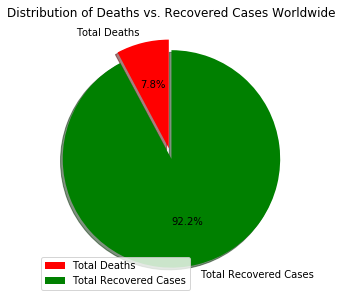

In [92]:
colors=["red", "green"]
explod=(0.10,0)
counts_by_country_py=pd.DataFrame({'Number of Confirmed Cases': [6440, 76034],},
                  index=["Total Deaths", "Total Recovered Cases"])
plot = counts_by_country_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Deaths vs. Recovered Cases Worldwide")
plot.set_ylabel('')

In [103]:
#Find the 20 countries with the greatest number of confirmed cases
top_20_confirmed=counts_by_country.nlargest(21, ['Number of Confirmed Cases'])
top_20_confirmed.head(21)


,Number of Confirmed Cases,Number of Deaths,Number of Recovered Cases
Country/Region,,,
China,81003,3203,67017
Italy,24747,1809,2335
Iran,13938,724,4590
"Korea, South",8162,75,510
Spain,7798,289,517
Germany,5795,11,46
France,4513,91,12
US,3499,63,12
Switzerland,2200,14,4


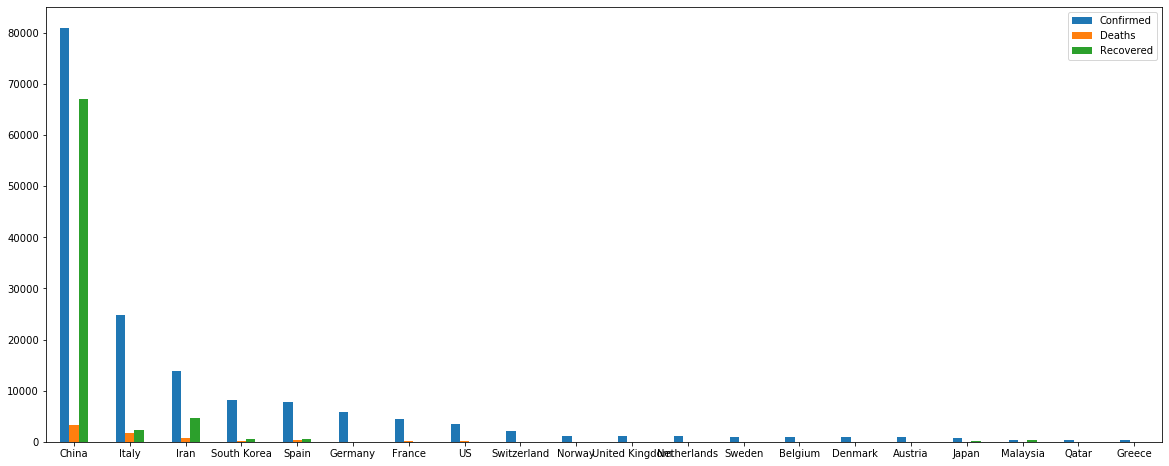

In [161]:
#Top 20 bar chart
confirmed=[81003, 24747, 13938, 8162, 7798, 5795, 4513, 3499, 2200, 1221, 1144, 1135, 1022, 886, 875, 860, 839, 428, 401, 331]
deaths=[3203, 1809, 724, 75, 289, 11, 91, 63,14, 3, 21, 20, 3, 4, 2, 1, 22, 0, 0, 4]
recovered=[67017, 2335, 4590, 510, 517, 46, 12, 12, 4, 1, 19, 2, 1, 1, 1, 6, 118, 325, 42, 4]
index=['China', 'Italy', 'Iran', 'South Korea', 'Spain', 'Germany', 'France', 'US','Switzerland', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Malaysia', 'Qatar', 'Greece']
df = pd.DataFrame({'Confirmed': confirmed,
                   'Deaths': deaths, 'Recovered': recovered}, index=index)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df.plot.bar(rot=0)
#index = top_20_confirmed.index.values.tolist()
#index

In [125]:
#top 5 dataframe
top_5_confirmed=counts_by_country.nlargest(5, ['Number of Confirmed Cases'])
top_5_confirmed.head(5)

,Number of Confirmed Cases,Number of Deaths,Number of Recovered Cases
Country/Region,,,
China,81003,3203,67017
Italy,24747,1809,2335
Iran,13938,724,4590
"Korea, South",8162,75,510
Spain,7798,289,517


In [128]:
top_5_confirmed.dtypes

Number of Confirmed Cases    int64
Number of Deaths             int64
Number of Recovered Cases    int64
dtype: object

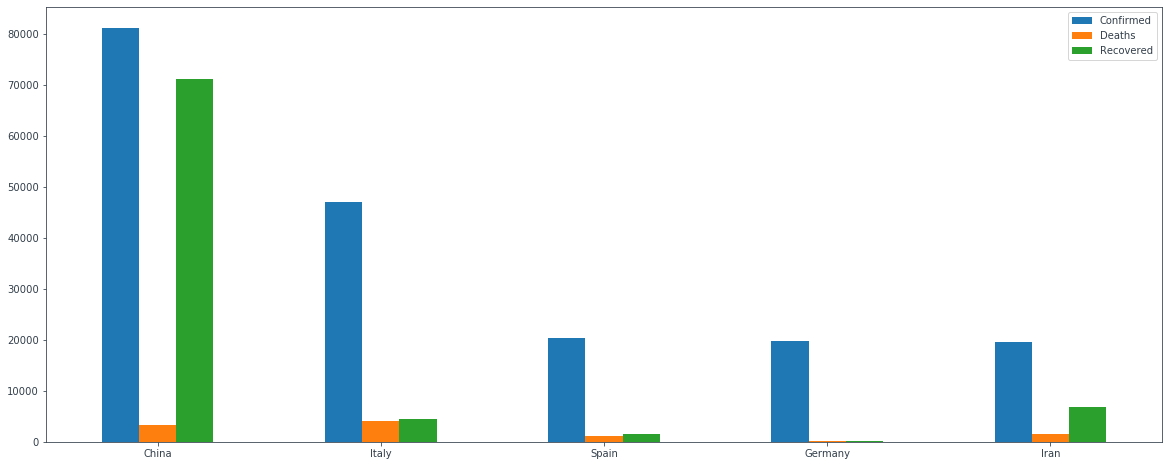

In [217]:
#top 5 bar chart
confirmed5=[81250, 47021,20410, 19848, 19644]
deaths5=[3253, 4032, 1043, 67, 1433]
recovered5=[71266, 4440, 1588, 180, 6745]
index5=['China', 'Italy', 'Spain', 'Germany', 'Iran']
df = pd.DataFrame({'Confirmed': confirmed5,
                   'Deaths': deaths5, 'Recovered': recovered5}, index=index5)

    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df.plot.bar(rot=0)


plt.savefig('groupedbar.png', dpi=300, bbox_inches='tight')

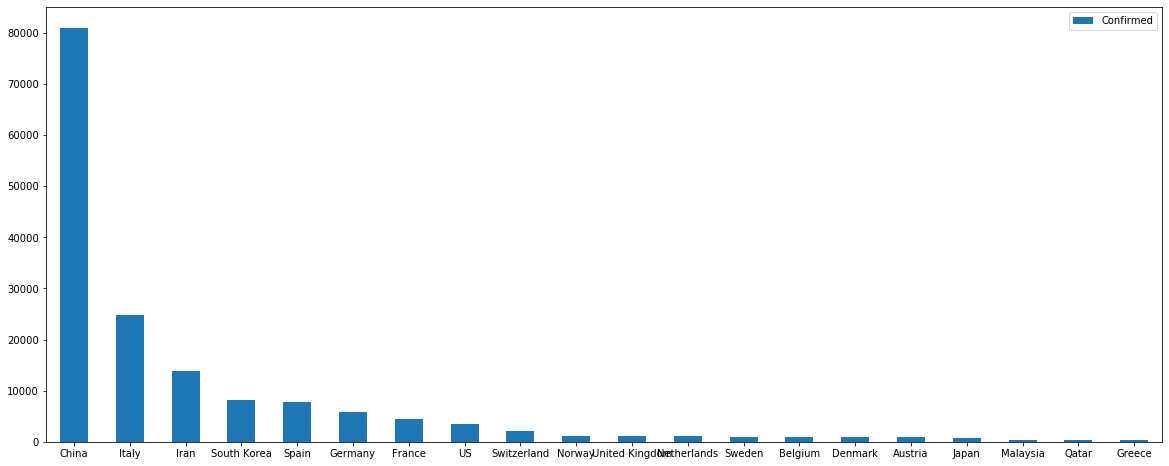

In [157]:
confirmed_5=[81003, 24747, 13938, 8162, 7798, 5795, 4513, 3499, 2200, 1221, 1144, 1135, 1022, 886, 875, 860, 839, 428, 401, 331]
#deaths5=[3203, 1809, 724, 75, 289]
#recovered5=[67017, 2335, 4590, 510, 517]
index_5=['China', 'Italy', 'Iran', 'South Korea', 'Spain', 'Germany', 'France', 'US','Switzerland', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Malaysia', 'Qatar', 'Greece']
confirmed_df = pd.DataFrame({'Confirmed': confirmed_5,},index=index_5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = confirmed_df.plot.bar(rot=0)

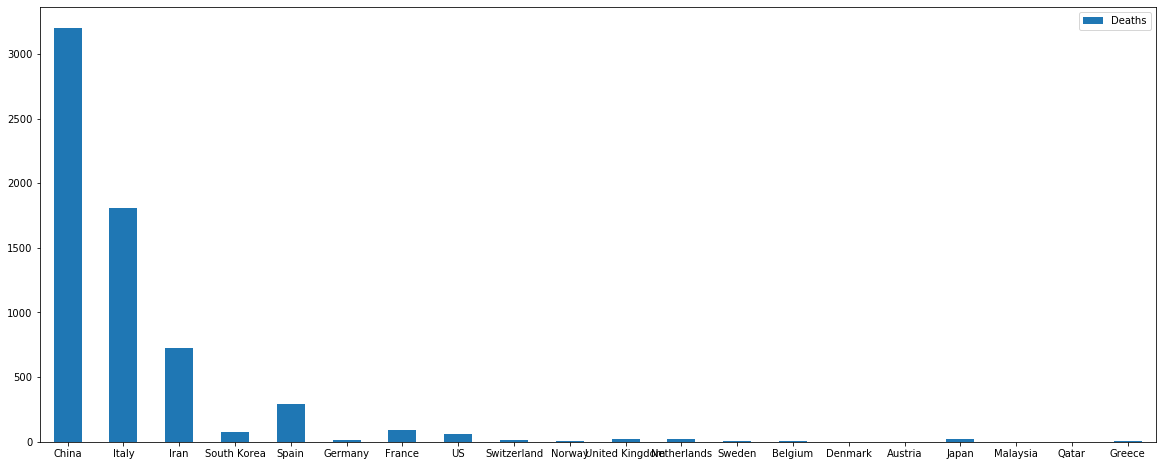

In [154]:
#Top 20 bar chart deaths
#confirmed=[81003, 24747, 13938, 8162, 7798, 5795, 4513, 3499, 2200, 1221, 1144, 1135, 1022, 886, 875, 860, 839, 428, 401, 331]
deaths_20=[3203, 1809, 724, 75, 289, 11, 91, 63,14, 3, 21, 20, 3, 4, 2, 1, 22, 0, 0, 4]
#recovered=[67017, 2335, 4590, 510, 517, 46, 12, 12, 4, 1, 19, 2, 1, 1, 1, 6, 118, 325, 42, 4]
index_deaths=['China', 'Italy', 'Iran', 'South Korea', 'Spain', 'Germany', 'France', 'US','Switzerland', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Malaysia', 'Qatar', 'Greece']
deaths_df = pd.DataFrame({'Deaths': deaths_20}, index=index_deaths)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = deaths_df.plot.bar(rot=0)


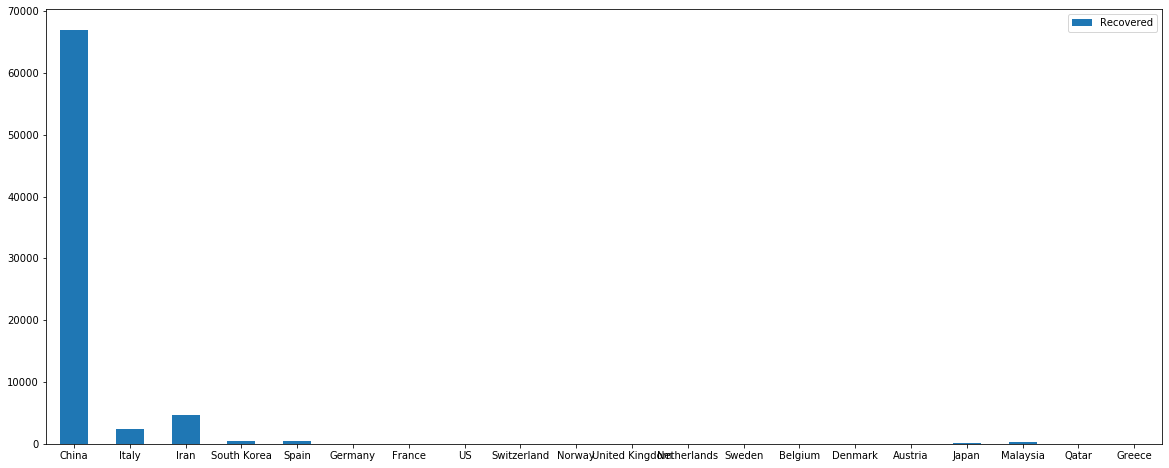

In [158]:
#Top 20 Recoveries bar chart
#confirmed=[81003, 24747, 13938, 8162, 7798, 5795, 4513, 3499, 2200, 1221, 1144, 1135, 1022, 886, 875, 860, 839, 428, 401, 331]
#deaths=[3203, 1809, 724, 75, 289, 11, 91, 63,14, 3, 21, 20, 3, 4, 2, 1, 22, 0, 0, 4]
recovered=[67017, 2335, 4590, 510, 517, 46, 12, 12, 4, 1, 19, 2, 1, 1, 1, 6, 118, 325, 42, 4]
r_index=['China', 'Italy', 'Iran', 'South Korea', 'Spain', 'Germany', 'France', 'US','Switzerland', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Malaysia', 'Qatar', 'Greece']
r_df = pd.DataFrame({'Recovered': recovered}, index=r_index)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = r_df.plot.bar(rot=0)


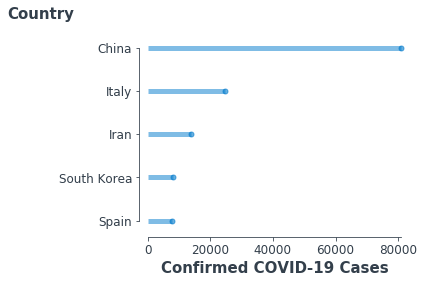

In [198]:
#top 5 bar chart confirmed cases
#confirmed5=[81003, 24747, 13938, 8162, 7798]
#deaths5=[3203, 1809, 724, 75, 289]
#recovered5=[67017, 2335, 4590, 510, 517]
#index5=['China', 'Italy', 'Iran', 'South Korea', 'Spain']
#df = pd.DataFrame({'Confirmed': confirmed5,
                   #'Deaths': deaths5, 'Recovered': recovered5}, index=index5)
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 8
#plt.rcParams["figure.figsize"] = fig_size
#ax = df.plot.bar(rot=0)

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# data
confirmed_only = pd.Series([81003, 24747, 13938, 8162, 7798],
index=['China', 'Italy', 'Iran', 'South Korea', 'Spain'])
df = pd.DataFrame({'Confirmed Cases' : confirmed_only})
df = df.sort_values(by='Confirmed Cases')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Confirmed Cases'], color='#007ACC', alpha=0.5, linewidth=5)


# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Confirmed Cases'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)


# set labels
ax.set_xlabel('Confirmed COVID-19 Cases', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Country', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

KeyError: 'Deaths'

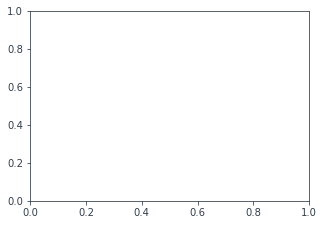

In [203]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# data
deaths_only = pd.Series([3203, 1809, 724, 75, 289],
index=['China', 'Italy', 'Iran', 'South Korea', 'Spain'])
deaths_df = pd.DataFrame({'Deaths' : deaths_only})
deaths_df = deaths_df.sort_values(by='Deaths')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Deaths'], color='#7ACC00', alpha=0.5, linewidth=5)


# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Deaths'], my_range, "o", markersize=5, color='#7ACC00', alpha=0.6)


# set labels
ax.set_xlabel('COVID-19 Deaths', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Country', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist3.png', dpi=300, bbox_inches='tight')

In [197]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# data
recovered_only = pd.Series([67017, 2335, 4590, 510, 517],
index=['China', 'Italy', 'Iran', 'South Korea', 'Spain'])
recovered_df = pd.DataFrame({'Recovered' : recovered_only})
recovered_df = recovered_df.sort_values(by='Recovered')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Recovered'], color=' #CCB800', alpha=0.5, linewidth=5)


# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Recovered'], my_range, "o", markersize=5, color='#CCB800', alpha=0.6)


# set labels
ax.set_xlabel('Recovered COVID-19 Cases', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Country', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('hist4.png', dpi=300, bbox_inches='tight')

KeyError: 'Recovered'

In [133]:
#Add column to dataframe for unresolved cases confirmed - (deaths+resolved)
# Convert the dictionary into DataFrame 
#top5 = pd.DataFrame(top_5_confirmed) 
  
# Using 'Number of Unresolved Cases' as the column name and equating it to the list 
unresolved_cases=[10783, 20603, 8624, 7577, 6992]
#top5 = top_5_confirmed.assign(Number of Unresolved Cases = ) 
top_5_confirmed['Number of Unresolved Cases'] = unresolved_cases 
# Observe the result 
top_5_confirmed

,Number of Confirmed Cases,Number of Deaths,Number of Recovered Cases,Number of Unresolved Cases
Country/Region,,,,
China,81003,3203,67017,10783
Italy,24747,1809,2335,20603
Iran,13938,724,4590,8624
"Korea, South",8162,75,510,7577
Spain,7798,289,517,6992


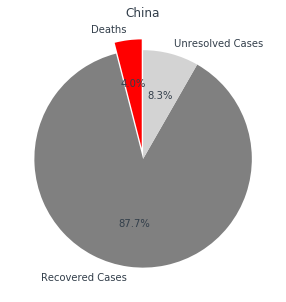

In [218]:
#Pie chart China
colors=["red", "gray", "lightgray"]
explode=(0.10,0,0)
china_py=pd.DataFrame({'Number of Confirmed Cases': [3253, 71266, 6731],},
                  index=["Deaths", "Recovered Cases", "Unresolved Cases"])
plot = china_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=False, startangle=90, legend=None)
plt.title("China")
plot.set_ylabel('')
plt.savefig('chinapie.png', dpi=300, bbox_inches='tight')


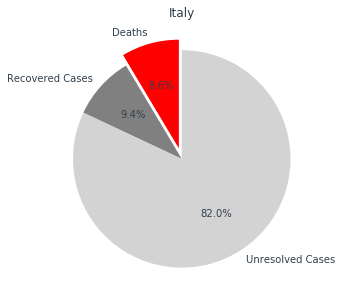

In [219]:
#Pie Chart Italy
colors=["red", "gray", "lightgray"]
explode=(0.10,0,0)
italy_py=pd.DataFrame({'Number of Confirmed Cases': [4032, 4440, 38549],},
                  index=["Deaths", "Recovered Cases", "Unresolved Cases"])
plot = italy_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=False, startangle=90, legend=None)
plt.title("Italy")
plot.set_ylabel('')
plt.savefig('italypie.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, '')

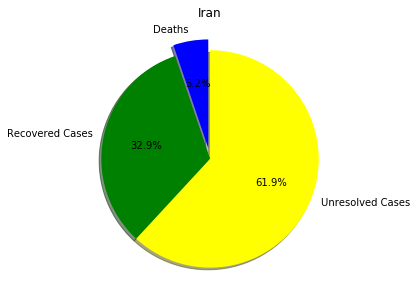

In [146]:
#Pie Chart Iran
colors=["blue", "green", "yellow"]
explode=(0.10,0,0)
iran_py=pd.DataFrame({'Number of Confirmed Cases': [724, 4590, 8624],},
                  index=["Deaths", "Recovered Cases", "Unresolved Cases"])
plot = iran_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=True, startangle=90, legend=None)
plt.title("Iran")
plot.set_ylabel('')

Text(0, 0.5, '')

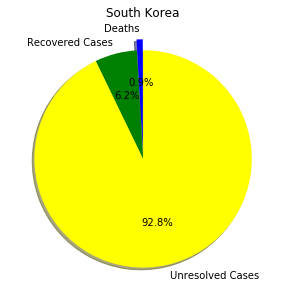

In [147]:
#Pie Chart South Korea
colors=["blue", "green", "yellow"]
explode=(0.10,0,0)
sk_py=pd.DataFrame({'Number of Confirmed Cases': [75, 510, 7577],},
                  index=["Deaths", "Recovered Cases", "Unresolved Cases"])
plot = sk_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=True, startangle=90, legend=None)
plt.title("South Korea")
plot.set_ylabel('')

Text(0, 0.5, '')

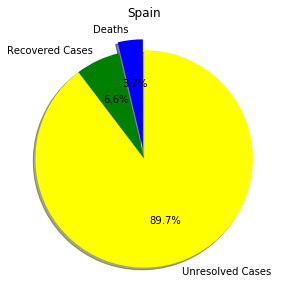

In [148]:
#Pie Chart Spain
colors=["blue", "green", "yellow"]
explode=(0.10,0,0)
spain_py=pd.DataFrame({'Number of Confirmed Cases': [289, 517, 6992],},
                  index=["Deaths", "Recovered Cases", "Unresolved Cases"])
plot = spain_py.plot.pie(y= 'Number of Confirmed Cases', explode=explode, colors=colors, figsize=(5, 5), autopct="%1.1f%%", shadow=True, startangle=90, legend=None)
plt.title("Spain")
plot.set_ylabel('')


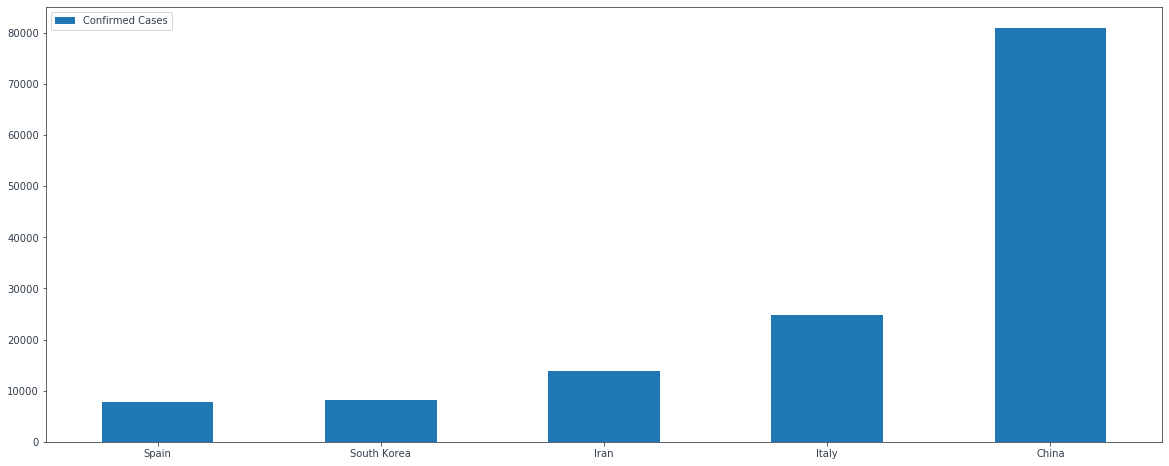

In [212]:
 #top 5 bar chart
confirmed_cases2=[81003, 24747, 13938, 8162, 7798]
#deaths5=[3203, 1809, 724, 75, 289]
#recovered5=[67017, 2335, 4590, 510, 517]
index2=['China', 'Italy', 'Iran', 'South Korea', 'Spain']
confirmed_cases2_df = pd.DataFrame({'Confirmed': confirmed5}, index=index2)

    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = df.plot.bar(rot=0)


plt.savefig('confirmedbar.png', dpi=300, bbox_inches='tight')


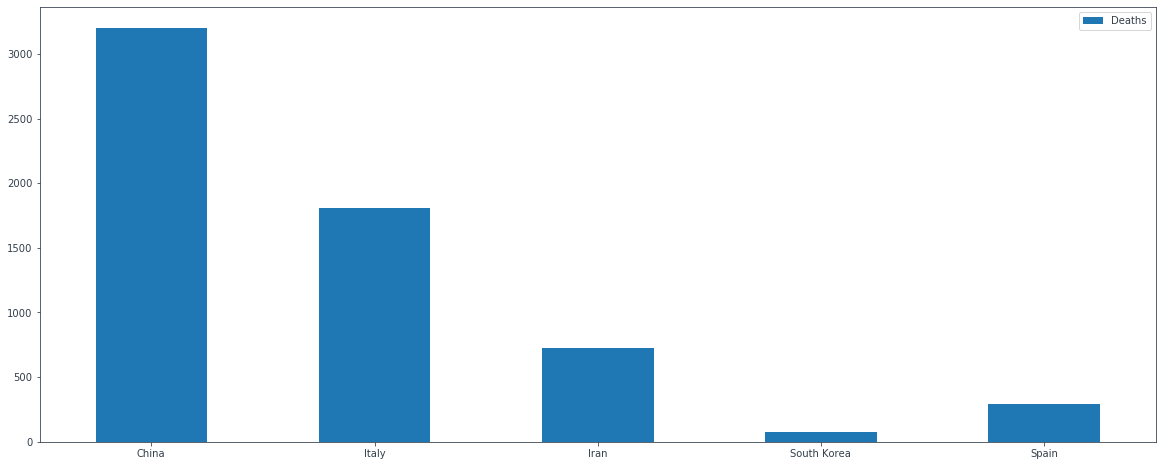

In [215]:
#top 5 bar chart
#confirmed5=[81003, 24747, 13938, 8162, 7798]
deaths_only_2=[3203, 1809, 724, 75, 289]
#recovered5=[67017, 2335, 4590, 510, 517]
index_deaths=['China', 'Italy', 'Iran', 'South Korea', 'Spain']
deaths_only_2_df = pd.DataFrame({'Deaths': deaths_only_2}, index=index_deaths)

    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = deaths_only_2_df.plot.bar(rot=0)


plt.savefig('deathsbarchart.png', dpi=300, bbox_inches='tight')

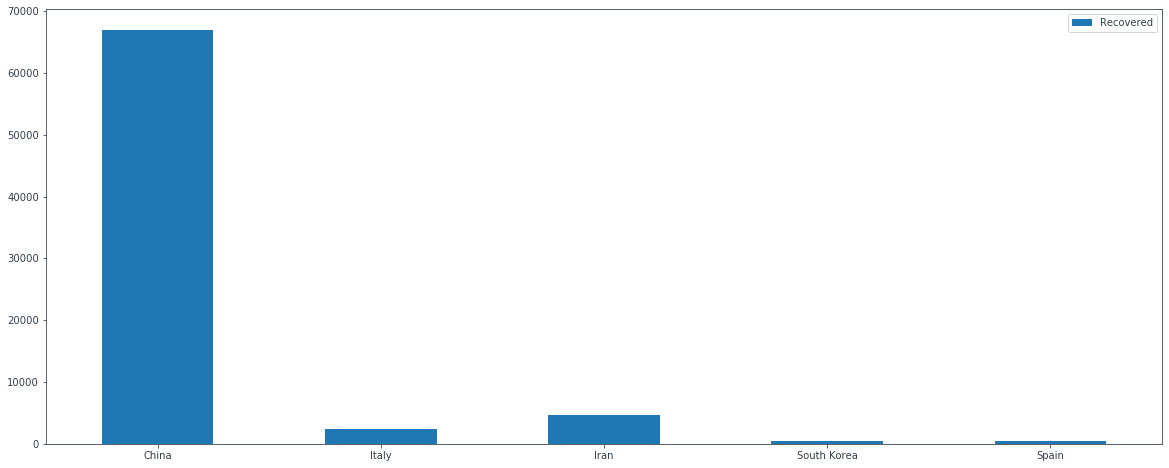

In [216]:
#top 5 bar chart
#confirmed5=[81003, 24747, 13938, 8162, 7798]
#deaths5=[3203, 1809, 724, 75, 289]
recovered_only1=[67017, 2335, 4590, 510, 517]
index_recovered=['China', 'Italy', 'Iran', 'South Korea', 'Spain']
recovered_df = pd.DataFrame({'Recovered': recovered_only1}, index=index_recovered)

    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
ax = recovered_df.plot.bar(rot=0)


plt.savefig('recovered.png', dpi=300, bbox_inches='tight')